Step 2: Importing Libraries
Step 3: Loading Dataset
Dataset Loaded: 
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6010 - loss: 0.9384 - val_accuracy: 0.6275 - val_loss: 0.6366 - learning_rate: 0.0010
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7527 - loss: 0.6179 - val_accuracy: 0.7215 - val_loss: 0.5824 - learning_rate: 0.0010
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7266 - loss: 0.5916 - val_accuracy: 0.7550 - val_loss: 0.5604 - learning_rate: 0.0010
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8038 - loss: 0.4868 - val_accuracy: 0.7416 - val_loss: 0.5470 - learning_rate: 0.0010
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8055 - loss: 0.5199 - val_accuracy: 0.7550 - val_loss: 0.5318 - learning_rate: 0.0010
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7788 - loss: 0.4870 - val_accuracy: 0.7752 - val_loss: 0.5213 - learning_rate: 0.0010
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8181 - loss: 0.4717 - val_accuracy: 0.77

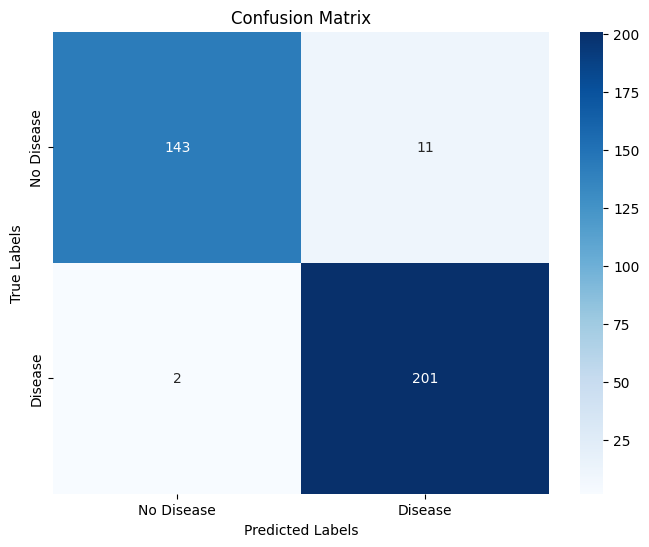

Classification Report:
              precision    recall  f1-score   support

           0     0.9862    0.9286    0.9565       154
           1     0.9481    0.9901    0.9687       203

    accuracy                         0.9636       357
   macro avg     0.9672    0.9594    0.9626       357
weighted avg     0.9645    0.9636    0.9634       357

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


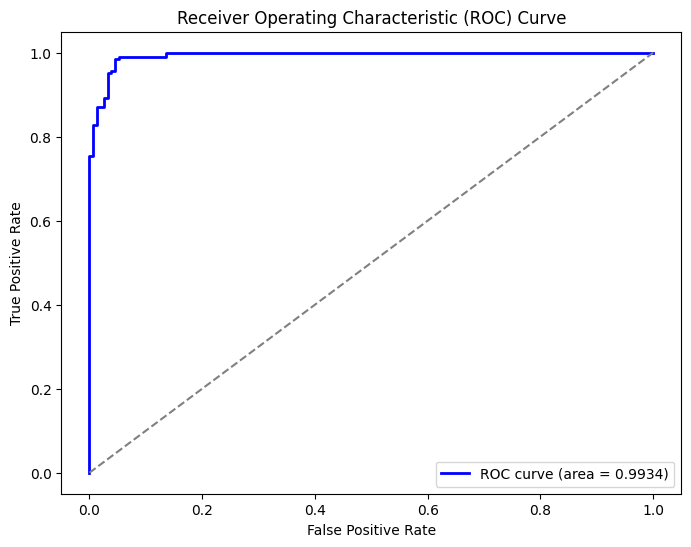

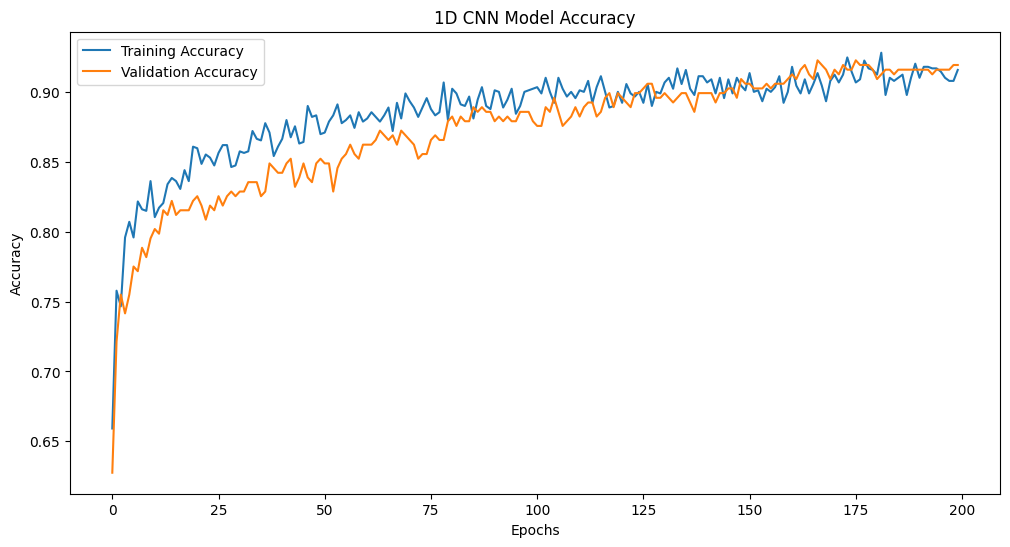

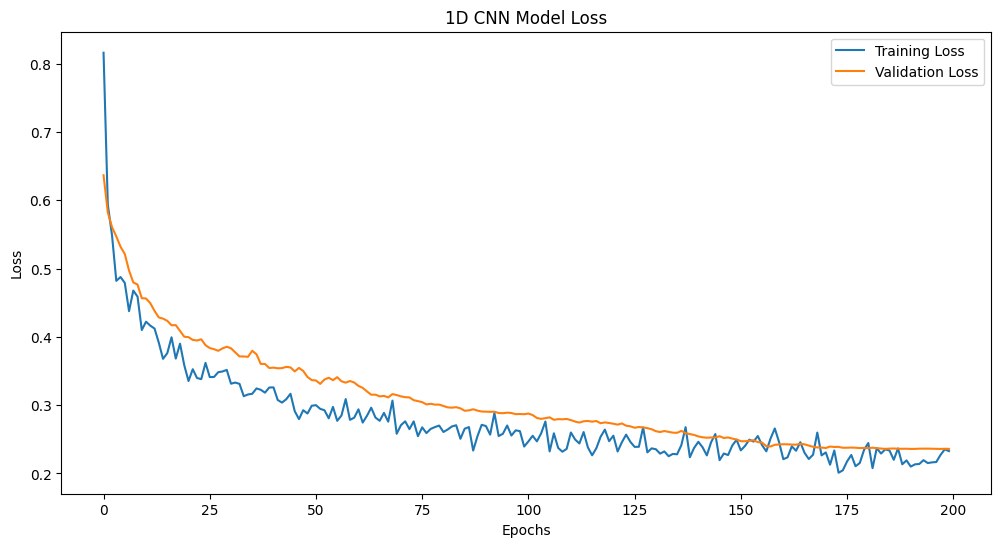

In [ ]:
# Install necessary packages
!pip install catboost dask[dataframe] xgboost lightgbm seaborn matplotlib scikit-learn imbalanced-learn statsmodels scipy tensorflow

# Step 2: Import Libraries
print("Step 2: Importing Libraries")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Step 3: Load Dataset
print("Step 3: Loading Dataset")
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
print("Dataset Loaded: ")
print(df.head())  # Verify the dataset

# Step 4: Handle Missing/Null Values
print("Step 4: Handling Missing/Null Values")
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical
        df[column] = df[column].fillna(df[column].mode()[0])
    else:  # Numerical
        if df[column].skew() > 1:  # Outliers exist
            df[column] = df[column].fillna(df[column].median())
        else:
            df[column] = df[column].fillna(df[column].mean())
print("Null values handled.")

# Step 5: Feature Encoding
print("Step 5: Feature Encoding")
label_encoder = LabelEncoder()
# Interaction features based on corr values
df['age_resting_bp'] = df['age'] * df['resting bp s']
df['age_oldpeak'] = df['age'] * df['oldpeak']
df['cholesterol_max_heart_rate'] = df['cholesterol'] * df['max heart rate']
df['resting_bp_oldpeak'] = df['resting bp s'] * df['oldpeak']

# Categorical interaction features
df['sex_chest_pain_type'] = df['sex'] * df['chest pain type']
df['sex_fasting_blood_sugar'] = df['sex'] * df['fasting blood sugar']
df['sex_resting_ecg'] = df['sex'] * df['resting ecg']
df['sex_exercise_angina'] = df['sex'] * df['exercise angina']
df['sex_st_slope'] = df['sex'] * df['ST slope']

df['chest_pain_type_fasting_blood_sugar'] = df['chest pain type'] * df['fasting blood sugar']
df['chest_pain_type_resting_ecg'] = df['chest pain type'] * df['resting ecg']
df['chest_pain_type_exercise_angina'] = df['chest pain type'] * df['exercise angina']
df['chest_pain_type_st_slope'] = df['chest pain type'] * df['ST slope']

df['fasting_blood_sugar_resting_ecg'] = df['fasting blood sugar'] * df['resting ecg']
df['fasting_blood_sugar_st_slope'] = df['fasting blood sugar'] * df['ST slope']

df['resting_ecg_exercise_angina'] = df['resting ecg'] * df['exercise angina']
df['resting_ecg_st_slope'] = df['resting ecg'] * df['ST slope']
df['exercise_angina_st_slope'] = df['exercise angina'] * df['ST slope']

# Combine Original and New Features for PCA
all_features = df.drop(columns=['target'])  # Exclude the target column
print("Feature Combination Completed.")

# Step 17: Feature Scaling
print("Step 17: Feature Scaling")
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

# Step 28: Apply PCA on All Features and Display Component Count
print("Step 28: Applying PCA on All Features")
pca = PCA(n_components=0.95)  # Retain 95% variance
all_features_pca = pca.fit_transform(all_features_scaled)
print(f"Reduced Features Shape after PCA: {all_features_pca.shape}")

# Reshape data to fit 1D CNN input requirements
X_cnn = all_features_pca.reshape(all_features_pca.shape[0], all_features_pca.shape[1], 1)

# Display the number of retained PCA components
num_pca_components = all_features_pca.shape[1]
print(f"Number of PCA Components Retained: {num_pca_components}")

# 1D CNN Model with Adjusted Kernel Sizes
print("Building and Training 1D CNN Model")
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(num_pca_components, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model with learning rate scheduler and optimizer
initial_lr = 0.001
optimizer = Adam(learning_rate=initial_lr)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler to reduce learning rate on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train the 1D CNN Model with callback
cnn_history = cnn_model.fit(
    X_cnn, df['target'],
    epochs=200,
    batch_size=32,
    validation_split=0.25,
    callbacks=[lr_scheduler]
)

# Step 29: Evaluate the CNN Model
print("Evaluating the CNN Model")
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, df['target'], test_size=0.3, random_state=42)
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))

# Evaluate the model on the test set and get loss and accuracy
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"1D CNN Model Accuracy: {cnn_accuracy:.4f}")
print(f"1D CNN Model Loss: {cnn_loss:.4f}")  # Print model loss

# Step 30: Generate Confusion Matrix
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test_cnn, y_pred_cnn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 31: Additional Performance Metrics (Optional)
# Print classification report for precision, recall, and F1-score with four decimal places
print("Classification Report:")
report = classification_report(y_test_cnn, y_pred_cnn, digits=4)
print(report)

# Optional: Plot ROC Curve (for additional model evaluation)
fpr, tpr, _ = roc_curve(y_test_cnn, cnn_model.predict(X_test_cnn))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Step 32: Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('1D CNN Model Accuracy')
plt.legend()
plt.show()

# Step 33: Plot loss
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('1D CNN Model Loss')
plt.legend()
plt.show()
